<a href="https://colab.research.google.com/github/Sharma-Pranav/DeepLearning/blob/master/Simple_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
# Get the Dataset
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#  Reshape X_data from (n,28,28) to (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [0]:
# One Hot Encoding Y_data
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [0]:
def cnn():
  'Creates a CNN every time this function is called'
  model = Sequential()
  model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size = (2,2)))
  model.add(Flatten())
  model.add(Dense(50, activation = 'relu'))
  model.add(Dense(10, activation = 'softmax'))
  
  adam = optimizers.Adam()
  model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
  return model

In [6]:
model = cnn()

Instructions for updating:
Colocations handled automatically by placer.


In [7]:
training_history = model.fit(X_train, Y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 12s 256us/step - loss: 8.3853 - acc: 0.4743 - val_loss: 6.7397 - val_acc: 0.5757
Epoch 2/100
48000/48000 [==============================] - 8s 160us/step - loss: 1.3139 - acc: 0.8870 - val_loss: 0.1122 - val_acc: 0.9664
Epoch 3/100
48000/48000 [==============================] - 8s 160us/step - loss: 0.0639 - acc: 0.9801 - val_loss: 0.0921 - val_acc: 0.9753
Epoch 4/100
48000/48000 [==============================] - 8s 161us/step - loss: 0.0348 - acc: 0.9890 - val_loss: 0.0934 - val_acc: 0.9777
Epoch 5/100
48000/48000 [==============================] - 8s 159us/step - loss: 0.0258 - acc: 0.9916 - val_loss: 0.0966 - val_acc: 0.9771
Epoch 6/100
48000/48000 [==============================] - 8s 161us/step - loss: 0.0195 - acc: 0.9936 - val_loss: 0.1005 - val_acc: 0.9779
Epoch 7/100
48000/48000 [==============================] - 8s 160us

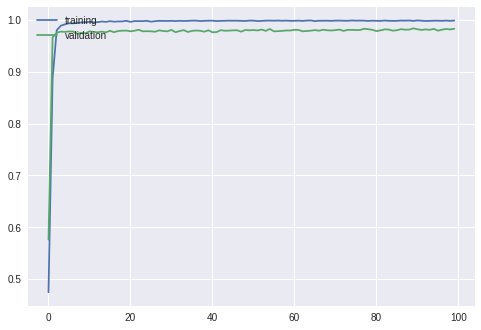

In [9]:
plt.plot(training_history.history['acc'])
plt.plot(training_history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')

In [10]:
results = model.evaluate(X_test, Y_test)
print('Test Accuracy', results[1])

10000/10000 [==============================] - 1s 72us/step
Test Accuracy 0.9806
